# 📦 Import Necessary Libraries
We begin by importing essential Python libraries for data handling and visualization.


In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


# 📂 Combine the Datasets
We load five years of historical weather data and combine them into a single DataFrame.

In [3]:
# Folder where your files are
folder_path = 'Data'

# List of filenames
file_names = [
    'Historical24hourWeatherForecast2020.csv',
    'Historical24hourWeatherForecast2021.csv',
    'Historical24hourWeatherForecast2022.csv',
    'Historical24hourWeatherForecast2023.csv',
    'Historical24hourWeatherForecast2024.csv',
]

# Create full paths
file_paths = [os.path.join(folder_path, file_name) for file_name in file_names]

# Read and combine them into one dataset
dfs = [pd.read_csv(fp) for fp in file_paths]
combined_data = pd.concat(dfs, ignore_index=True)

# 📋 Data Cleaning
We select important columns and handle missing values to prepare the data for analysis.

In [4]:
# Select only important columns
selected_columns = [
    'date', 
    'wind_speed_high', 'wind_speed_low',
    'relative_humidity_high', 'relative_humidity_low',
    'forecast_text'
]
clean_data = combined_data[selected_columns].copy()

# Convert 'date' to datetime format
clean_data['date'] = pd.to_datetime(clean_data['date'], errors='coerce')

# Remove rows with invalid or missing dates
clean_data = clean_data.dropna(subset=['date'])

# Check if any other missing values
print("Missing values per column:\n", clean_data.isnull().sum())

Missing values per column:
 date                      0
wind_speed_high           0
wind_speed_low            0
relative_humidity_high    0
relative_humidity_low     0
forecast_text             0
dtype: int64


# 📊 Summarize the Data


In [5]:
# General statistics
summary = clean_data.describe(include='all')
print("\nSummary Statistics:\n", summary)



Summary Statistics:
                                  date  wind_speed_high  wind_speed_low  \
count                           46820     46820.000000    46820.000000   
unique                            NaN              NaN             NaN   
top                               NaN              NaN             NaN   
freq                              NaN              NaN             NaN   
mean    2022-06-23 21:58:45.570269184        19.863306        9.397480   
min               2020-01-05 00:00:00        10.000000        5.000000   
25%               2021-04-01 00:00:00        15.000000        5.000000   
50%               2022-06-20 00:00:00        20.000000       10.000000   
75%               2023-09-22 00:00:00        25.000000       10.000000   
max               2024-12-31 00:00:00        40.000000       30.000000   
std                               NaN         5.102853        3.613705   

        relative_humidity_high  relative_humidity_low     forecast_text  
count          

In [6]:
# Most common forecast types
forecast_counts = clean_data['forecast_text'].value_counts()
print("\nForecast Type Counts:\n", forecast_counts)


Forecast Type Counts:
 forecast_text
Thundery Showers                           33497
Showers                                     3376
Partly Cloudy (Day)                         2174
Windy                                       1462
Moderate Rain                               1186
Cloudy                                      1049
Light Rain                                  1020
Passing Showers                             1013
Fair & Warm                                  788
Heavy Thundery Showers with Gusty Winds      597
Fair (Day)                                   517
Heavy Thundery Showers                        63
Heavy Rain                                    33
Heavy Showers                                 21
Light Showers                                 15
Slightly Hazy                                  6
Hazy                                           3
Name: count, dtype: int64


# 📈 Data Visualization
We create clear, easy-to-read charts to reveal weather trends and insights.


In [7]:
# Set plot style
sns.set_theme(style="whitegrid")

# Add a 'year-month' column for monthly grouping
clean_data['year_month'] = clean_data['date'].dt.to_period('M')

# Group and calculate monthly average humidity
monthly_humidity = clean_data.groupby('year_month')[['relative_humidity_high', 'relative_humidity_low']].mean()

# Group and calculate monthly average wind speed
monthly_wind_speed = clean_data.groupby('year_month')[['wind_speed_high', 'wind_speed_low']].mean()

# Convert year_month back to string for plotting
monthly_humidity.index = monthly_humidity.index.astype(str)
monthly_wind_speed.index = monthly_wind_speed.index.astype(str)


# Plot 1: Monthly Average Humidity in Singapore (2020–2024)

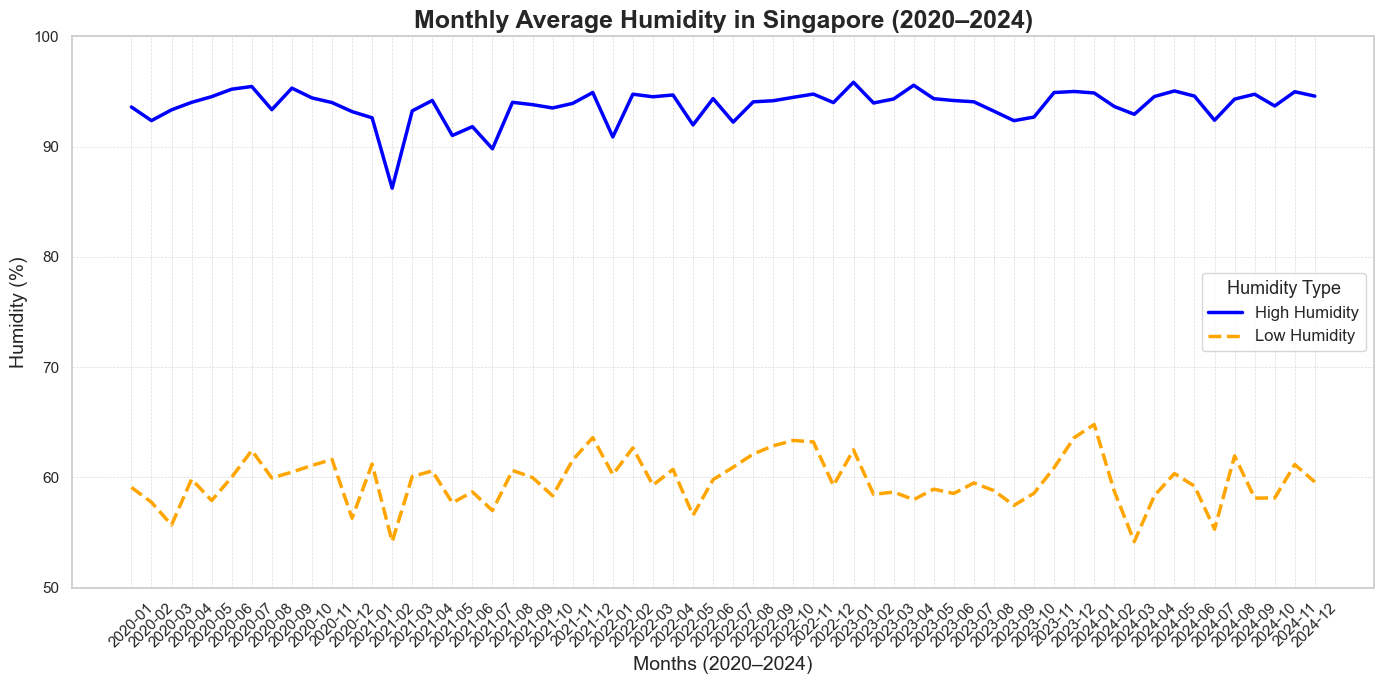

In [8]:
# Plot 1: Monthly Average Humidity in Singapore (2020–2024)

plt.figure(figsize=(14,7))

# Plot High Humidity
sns.lineplot(
    data=monthly_humidity,
    x=monthly_humidity.index,
    y='relative_humidity_high',
    label='High Humidity',
    color='blue',
    linewidth=2.5
)

# Plot Low Humidity (dashed line)
sns.lineplot(
    data=monthly_humidity,
    x=monthly_humidity.index,
    y='relative_humidity_low',
    label='Low Humidity',
    color='orange',
    linewidth=2.5,
    linestyle='--'
)

# Title and labels
plt.title('Monthly Average Humidity in Singapore (2020–2024)', fontsize=18, fontweight='bold')
plt.xlabel('Months (2020–2024)', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)

# Y-axis
plt.ylim(50, 100)

# Rotate x-axis
plt.xticks(rotation=45)

# Light grid
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
plt.legend(title='Humidity Type', fontsize=12, title_fontsize=13)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()


# Interpretation of the Chart: Monthly Average Humidity in Singapore (2020–2024)

## Overview of the Data

The chart displays the monthly average humidity in Singapore over a five-year period, from January 2020 to December 2024. The blue line represents the average high humidity, while the orange dashed line indicates the average low humidity.

## Overall Trends

- **High Humidity**: The blue line shows high humidity consistently ranging from 85% to 95% across the five years. It remains elevated with minor fluctuations, reflecting Singapore’s persistently moist tropical climate.
- **Low Humidity**: The orange dashed line fluctuates between 55% and 65%, indicating some variability in the lower humidity levels but still within a relatively high range for a tropical region.
- **Consistency**: Both high and low humidity levels exhibit stability over the period, with high humidity rarely dropping below 85% and low humidity maintaining a baseline above 55%.

## Seasonal Patterns

- **Recurring Trend**: High humidity shows small, periodic dips, such as in early 2021 (around 85%) and late 2023, while peaking at 95% in late 2020 and mid-2022. Low humidity also dips to around 55% in early 2020, mid-2021, and late 2023, with peaks near 65% in mid-2022 and early 2024.
- **Environmental Context**: These fluctuations are strongly influenced by monsoon seasons in Singapore. The Northeast Monsoon (November to March) may bring wetter conditions, increasing humidity (e.g., the 95% peak in late 2020), while the Southwest Monsoon (June to September) might introduce slightly drier air, contributing to dips like in mid-2021.

## Variability and Extremes

- **Differences Across Years**: The gap between high and low humidity remains fairly consistent, typically around 25-35%, with no drastic year-to-year changes. However, periods like late 2020 and mid-2022 show slightly larger gaps due to peaks in high humidity.
- **Key Extremes**: The highest recorded high humidity is 95% in late 2020 and mid-2022, while the lowest low humidity is around 55% in early 2020, mid-2021, and late 2023. These extremes highlight the range of humidity conditions in Singapore.

## Key Observations

- **Peak Moments**: High humidity peaks at 95% in late 2020 (November/December) and mid-2022 (June/July) suggest periods of intense moisture, possibly due to heavy rainfall during monsoon seasons.
- **Low Points**: Dips in low humidity to 55% in early 2020, mid-2021, and late 2023 indicate brief periods of relative dryness, potentially offering more comfortable conditions.
- **Predictability**: The stable range of humidity levels underscores Singapore’s consistent tropical climate, with minor variations driven by seasonal weather patterns.

---

## Conclusion

The chart reveals that Singapore’s humidity from 2020 to 2024 remains consistently high, with high humidity between 85% and 95% and low humidity between 55% and 65%. Seasonal patterns tied to monsoons cause minor fluctuations, such as peaks at 95% in late 2020 and mid-2022, and dips to 55% in early 2020 and late 2023.

# Plot 2: Monthly Average Wind Speeds in Singapore (2020–2024)

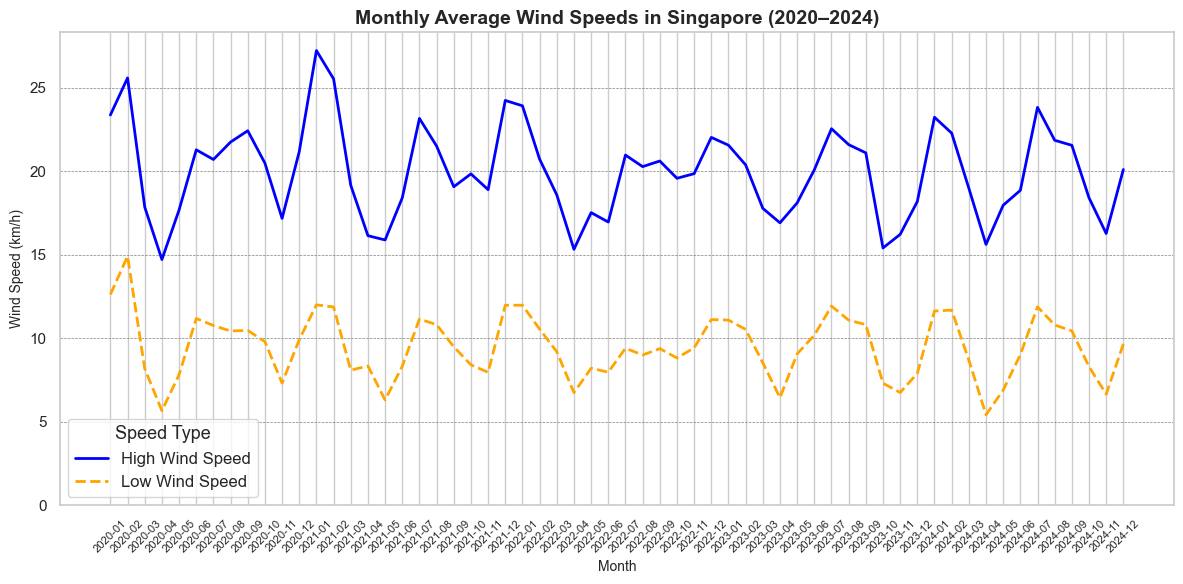

In [9]:
sns.set_theme(style="whitegrid")

# Add a 'year-month' column for monthly grouping
clean_data['year_month'] = clean_data['date'].dt.to_period('M')

# Group and calculate monthly average wind speed
monthly_wind_speed = clean_data.groupby('year_month')[['wind_speed_high', 'wind_speed_low']].mean()

# Convert year_month back to string for plotting
monthly_wind_speed.index = monthly_wind_speed.index.astype(str)

# Plot 2: Monthly Average Wind Speeds in Singapore (2020–2024
plt.figure(figsize=(12, 6))

# Plot the high and low wind speeds
sns.lineplot(data=monthly_wind_speed['wind_speed_high'], label="High Wind Speed", color='blue', linewidth=2)
sns.lineplot(data=monthly_wind_speed['wind_speed_low'], label="Low Wind Speed", color='orange', linestyle='--', linewidth=2)

# Title
plt.title('Monthly Average Wind Speeds in Singapore (2020–2024)', fontsize=14, fontweight='bold')

# X-axis (Month)
plt.xlabel('Month', fontsize=10)
plt.xticks(rotation=45)
plt.xticks(monthly_wind_speed.index, fontsize=8)
# Y-axis (Wind Speed)
plt.ylabel('Wind Speed (km/h)', fontsize=10)
plt.yticks(range(0, 30, 5))

# Gridlines
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

# Legend
plt.legend(title='Speed Type', fontsize=12, title_fontsize=13)

# Show the plot
plt.tight_layout()
plt.show()

# Interpretation of the Chart: Monthly Average Wind Speed (High and Low)

## Overview of the Data

The chart displays the monthly average wind speeds in Singapore over a five-year period, from January 2020 to December 2024. The blue line represents the average high wind speeds, while the orange dashed line indicates the average low wind speeds.

## Overall Trends

- **High Wind Speeds**: The blue line shows high wind speeds ranging from 15 to 25 km/h across the five years. Peaks reach approximately 25 km/h, notably in January 2020 and early 2024, indicating periods of stronger winds.
- **Low Wind Speeds**: The orange dashed line fluctuates between 5 and 15 km/h, with the lowest points around 5 km/h in mid-2020 and late 2024, reflecting calmer conditions.
- **Consistency**: Both high and low wind speeds maintain a stable range, suggesting a moderate but predictable wind climate in Singapore.

## Seasonal Patterns

- **Recurring Trend**: Wind speeds consistently peak at the beginning of each year, particularly in January and February, before declining toward mid- and late-year months. This consistent annual pattern reflects the recurring influence of monsoon-driven winds.
- **Environmental Context**: The increase in wind speeds early in the year aligns with the Northeast Monsoon (November to March), which typically brings stronger winds to Singapore. For instance, the 25 km/h peak in January 2020 corresponds to this seasonal influence.

## Variability and Extremes

- **Differences Across Years**: The gap between high and low wind speeds varies over time. Early 2020 and early 2024 show larger differences (up to 15-20 km/h), indicating periods of greater wind variability, while other years exhibit smaller gaps, suggesting more stable conditions.
- **Key Extremes**: The highest recorded wind speed is 25 km/h in January 2020, and the lowest is 5 km/h in mid-2020 and late 2024. These points highlight the range of wind conditions experienced in Singapore.

## Key Observations

- **Peak Moments**: Notable highs of 25 km/h in January 2020 and early 2024 may reflect intensified monsoon activity or specific weather events.
- **Low Points**: Dips to 5 km/h in mid-2020 and late 2024 suggest periods of relative calm, potentially linked to weaker monsoon influences or transitional weather phases.
- **Predictability**: Despite variability, the wind speed ranges remain consistent, reinforcing Singapore’s stable tropical climate.

---

## Conclusion

The chart reveals that Singapore’s wind speeds from 2020 to 2024 exhibit a stable range (15-25 km/h for highs, 5-15 km/h for lows) with a clear seasonal pattern tied to the Northeast Monsoon. Greater variability in certain years, such as early 2020 and 2024, adds depth to the analysis, while extremes like the 25 km/h peak in January 2020 provide specific insights.

# Plot 3: Dominant Weather Forecasts in Singapore (2020–2023)

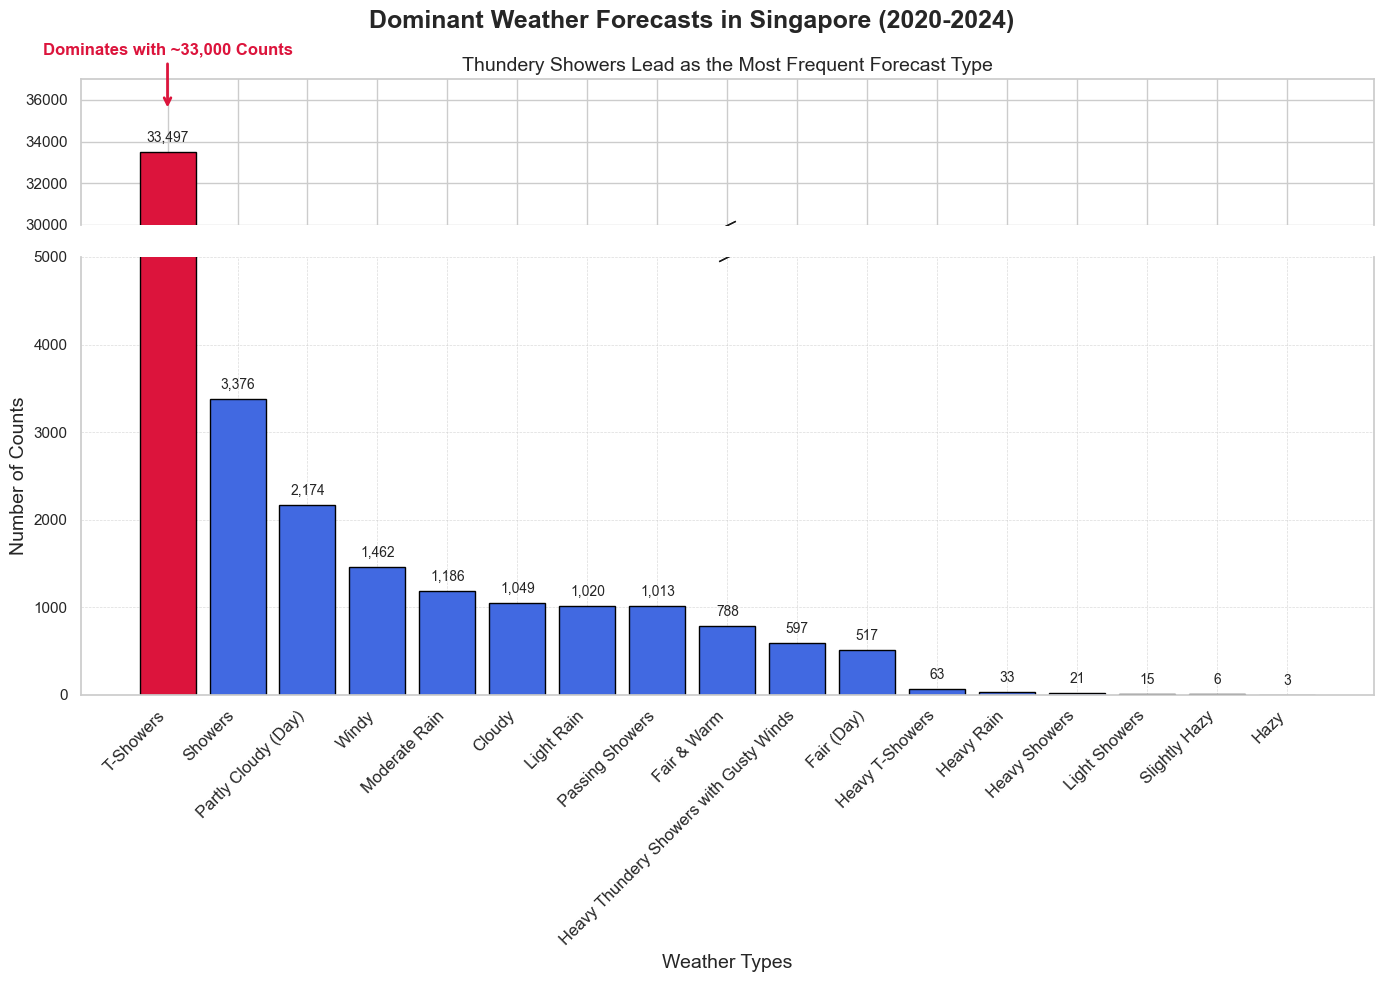

In [10]:
# Plot 3: Dominant Weather Forecasts in Singapore (2020–2023) — with Broken Y-Axis and Rare Event Colors

# Sort by frequency
forecast_counts_sorted = forecast_counts.sort_values(ascending=False)

# Shorten long weather type labels if needed
short_labels = {
    'Heavy Thundery Showers': 'Heavy T-Showers',
    'Partly Cloudy (Day)': 'Partly Cloudy (Day)',
    'Partly Cloudy (Night)': 'Partly Cloudy (Night)',
    'Light Rain Showers': 'Light Rain',
    'Moderate Rain Showers': 'Moderate Rain',
    'Thundery Showers': 'T-Showers',
    'Hazy': 'Hazy',
    'Slightly Hazy': 'Slightly Hazy'
}

forecast_counts_sorted.index = [
    short_labels.get(label, label) for label in forecast_counts_sorted.index
]

# Assign custom colors:
# - Crimson for T-Showers
# - Gray for rare weather types (Hazy, Slightly Hazy)
# - Royal blue for others
rare_labels = ['Hazy', 'Slightly Hazy']
colors = []
for label in forecast_counts_sorted.index:
    if label == 'T-Showers':
        colors.append('crimson')
    elif label in rare_labels:
        colors.append('gray')
    else:
        colors.append('royalblue')

# Create two subplots (top and bottom) with shared x-axis
fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True, figsize=(14,10), gridspec_kw={'height_ratios': [1, 3]})

# Top plot (for T-Showers)
bars_top = ax_top.bar(
    forecast_counts_sorted.index,
    forecast_counts_sorted.values,
    color=colors,
    edgecolor='black'
)
# Bottom plot (for others)
bars_bottom = ax_bottom.bar(
    forecast_counts_sorted.index,
    forecast_counts_sorted.values,
    color=colors,
    edgecolor='black'
)

# Set y-axis limits
ax_top.set_ylim(30000, 37000)    # Only shows big values (for T-Showers)
ax_bottom.set_ylim(0, 5000)      # Zoomed in for smaller bars

# Hide spines between plots
ax_top.spines['bottom'].set_visible(False)
ax_bottom.spines['top'].set_visible(False)

# Add 'break' slashes
d = .5  # Size of break line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, linestyle='none', color='k', mec='k', mew=1)
ax_top.plot([0.5, 0.5], [0, 0], transform=ax_top.transAxes, **kwargs)
ax_bottom.plot([0.5, 0.5], [1, 1], transform=ax_bottom.transAxes, **kwargs)

# Titles and labels
fig.suptitle('Dominant Weather Forecasts in Singapore (2020-2024)', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.88)
ax_top.set_title('Thundery Showers Lead as the Most Frequent Forecast Type', fontsize=14)

ax_bottom.set_xlabel('Weather Types', fontsize=14)
ax_bottom.set_ylabel('Number of Counts', fontsize=14)

# Rotate x labels
ax_bottom.set_xticks(range(len(forecast_counts_sorted.index)))
ax_bottom.set_xticklabels(forecast_counts_sorted.index, rotation=45, ha='right', fontsize=12)


# Add data labels
for ax in [ax_top, ax_bottom]:
    for bar in ax.patches:
        height = bar.get_height()
        if height > 0:
            ax.annotate(
                f'{int(height):,}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10
            )

# Highlight Thundery Showers
# Calculate a higher point above the dominant bar
arrow_x = forecast_counts_sorted.index.get_loc('T-Showers')
arrow_y = forecast_counts_sorted['T-Showers'] + 2000  # Adjust as needed

# Annotate
ax_top.annotate(
    'Dominates with ~33,000 Counts',
    xy=(arrow_x, arrow_y),
    xytext=(0, 40),  # offset text further from that arrow point
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color='crimson', lw=2,),
    ha='center', fontsize=12, color='crimson', fontweight='bold'
)

# Light gridlines for bottom plot
ax_bottom.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()


# Interpretation of the Chart: Dominant Weather Forecasts in Singapore (2020–2024)

## Overview of the Data

The chart presents the most common weather forecast types in Singapore over a five-year period, from 2020 to 2024. The histogram displays various weather conditions along the x-axis (e.g., Thundery Showers, Partly Cloudy) and the number of counts each was forecasted on the y-axis.

## Overall Trends

- **Dominant Weather Type**: Thundery Showers are the most frequently forecasted weather type, forecasted across the dataset for about 1,825 days, significantly outpacing all other conditions.
- **Secondary Weather Types**: Partly Cloudy and Windy (Day) forecasts follow, while other conditions like Moderate Rain and Cloudy are forecasted on fewer than 5,000 counts.
- **Distribution**: The majority of weather types (e.g., Light Rain, Passing Showers, Heavy Thundery Showers) are forecasted on fewer than 2,500 counts, indicating a long tail of less common forecasts.

## Seasonal Patterns

- **Recurring Trend**: The overwhelming frequency of Thundery Showers suggests that this weather type is a staple of Singapore’s climate, likely driven by its tropical location near the equator, where thunderstorms are common year-round.
- **Environmental Context**: The high incidence of Thundery Showers aligns with Singapore’s monsoon seasons—Northeast Monsoon (November to March) and Southwest Monsoon (June to September)—which bring frequent rain and thunderstorms. Partly Cloudy and Windy conditions may reflect transitional periods or drier intervals between monsoon-driven rains.

## Variability and Extremes

- **Differences Across Types**: There is a stark contrast between the most common forecast (Thundery Showers at ~35,000 counts) and the least common (Hazy and Slightly Hazy, each under 1,000 counts). This indicates a highly skewed distribution where thundery showers dominate.
- **Key Extremes**: Thundery Showers peak at around 35,000 counts, while Hazy conditions are the least frequent, likely due to rare occurrences of haze, such as during regional forest fire events. Other extremes include Heavy Thundery Showers, which, despite being intense, are forecasted far less often (under 2,500 counts).

## Key Observations

- **Dominance of Rain-Related Forecasts**: Thundery Showers, Moderate Rain, Light Rain, Passing Showers, and Heavy Thundery Showers collectively highlight that rain-related forecasts dominate Singapore’s weather, reflecting its tropical, rain-heavy climate.
- **Rare Weather Events**: Hazy and Slightly Hazy conditions are rare, likely tied to specific events like transboundary haze from forest fires in neighbouring regions, which are not a regular occurrence.
- **Predictability**: The prevalence of Thundery Showers suggests a predictable weather pattern, with other conditions like Partly Cloudy and Windy offering occasional breaks from rain-heavy forecasts.

---

## Conclusion

The chart reveals that Thundery Showers are the most common weather forecast in Singapore from 2020 to 2024, forecasted across the dataset for about 1,825 days, far surpassing other conditions like Partly Cloudy and Windy (~5,000 counts each). The dominance of rain-related forecasts aligns with Singapore’s tropical climate and monsoon patterns, while rare forecasts like Hazy conditions reflect occasional environmental events.